<a id='sec_Notebooks_Circ_1_qubit'></a>
# Circuitos de un qúbit y HardWare real 
$\newcommand{\ket}[1]{|#1\rangle}$

## Índice

- **[1 - Creación y medición de circuitos de 1 qúbit con Qiskit](#sec_Notebooks_Circ_1_qubit_1)**
    - **[1.1 - Sin puertas](#sec_Notebooks_Circ_1_qubit_1.1)**
    - **[1.2 - Puerta $X$](#sec_Notebooks_Circ_1_qubit_1.2)**
    - **[1.3 - Puerta H](#sec_Notebooks_Circ_1_qubit_1.3)**
    - **[1.4 - Inicializar el circuito a partir de un vector de estado](#sec_Notebooks_Circ_1_qubit_1.4)**
- **[2 - Mandar trabajos a un ordenador real de IBM](#sec_Notebooks_Circ_1_qubit_2)**
    - **[2.1 - Recuperar resultados de trabajos anteriores con el job id](#sec_Notebooks_Circ_1_qubit_2.1)**
- **[3 - La moneda cuántia](#sec_Notebooks_Circ_1_qubit_3)**
- **[4 - Valores esperados](#sec_Notebooks_Circ_1_qubit_4)**
    - **[4.1  Valor esperado de un observable arbitrario (operador hermítico).](#sec_Notebooks_Circ_1_qubit_4.1)**
        - **[4.1.1  Inicializando estado $| \Psi \rangle $](#sec_Notebooks_Circ_1_qubit_4.1.1)**
        - **[4.1.2  Midiendo $\langle Z \rangle$](#sec_Notebooks_Circ_1_qubit_4.1.2)**
        - **[4.1.3  Midiendo $\langle X \rangle$](#sec_Notebooks_Circ_1_qubit_4.1.3)**
        - **[4.1.4  Midiendo $\langle Y \rangle$](#sec_Notebooks_Circ_1_qubit_4.1.4)**
    - **[4.2  Valor esperado de un operador unitario (no necesariamente hermítico)](#sec_Notebooks_Circ_1_qubit_4.2)**

In [1]:
# Importamos las librerías y clases necesarias
import numpy as np
from qiskit.circuit import QuantumRegister, ClassicalRegister,QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.quantum_info import Statevector

# Import para visualización
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

In [2]:
# Definimos un registro cuántico con un qúbit
quantum_reg = QuantumRegister(1) 

# Definimos un registro clásico con un bit
classic_reg = ClassicalRegister(1)

En Qiskit no es necesario definir los registros, pero cuando veamos algoritmo más complejos veremos lo útil que es tener los qúbits separados en registros. 

Importemos el simulador que vamos a usar en este notebook:

In [3]:
# Importamos el simulador. Con "method" le especificamos el método de simulación
simulador = AerSimulator(method = 'statevector')

También podemos llamar primero a la clase del simulador sin pasarle argumentos y después añadir las opciones:

In [4]:
#simulador = AerSimulator()
#sim.set_options(method = 'statevector')

<a id='sec_Notebooks_Circ_1_qubit_1'></a>
## Creación y medición de circuitos de 1 qúbit con Qiskit

<a id='sec_Notebooks_Circ_1_qubit_1.1'></a>
### Sin puertas

Creamos un primer circuito. En este solo vamos a poner un medidor. De esta forma vamos a verificar que por defecto Qiskit (y la mayoría de libreas de quantum) inicializan los estados en $| 0 \rangle$

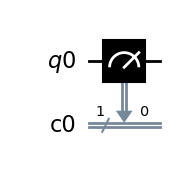

In [5]:
# Creamos el circuito pasandole los registros. 
circuit = QuantumCircuit(quantum_reg, classic_reg)

# Añadimos el medidor
circuit.measure(quantum_reg, classic_reg)
# Lo que le estamos diciendo es que medida los qúbits del "quantum_reg"
# y almacene los resultados de la medida en los bits del "classic_reg"


# Dibujamos el circuito
circuit.draw(output='mpl') # mpl es de Matplolib

El método `circuit.draw('mpl')` genera una figura de Matplotlib, así que podemos almacenarla en una variable y usar los métodos típicos de Matplotlib como el `savefig()`

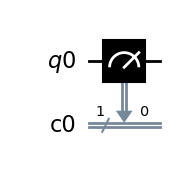

In [6]:
Fig = circuit.draw(output='mpl')
Fig.savefig("Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_1")
Fig

También se puede dibujar el circuito como texto para imprimirlo por terminal

In [7]:
print(circuit.draw(output='text'))

      ┌─┐
  q0: ┤M├
      └╥┘
c0: 1/═╩═
       0 


Transpilamos el circuito. Veremos más adelante lo que es la transpilación cuando hablemos de sets de puertas universales.

In [8]:
# transpilamos
t_circuit = transpile(circuit, backend = simulador)

Ahora podemos ejecutar la simulación

Ejecutamos la simulación con 1000 shots (es decir, corremos el circuito 1000 veces)

In [9]:
# Ejecutamos la simulación con 1000 shots 
result = simulador.run(t_circuit, shots = 1000).result()
result

Result(backend_name='aer_simulator_statevector', backend_version='0.12.2', qobj_id='', job_id='6ce06c21-2106-440f-971c-10bdde4e0f51', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1000}), header=QobjExperimentHeader(creg_sizes=[['c0', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit-122', qreg_sizes=[['q0', 1]], metadata={}), status=DONE, seed_simulator=106023935, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0], 'num_clbits': 1, 'parallel_state_update': 20, 'sample_measure_time': 6.5781e-05, 'num_qubits': 1, 'device': 'CPU', 'input_qubit_map': [[0, 0]], 'method': 'statevector', 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.000518695)], date=2023-10-18T13:01:47.021975, status=COMPLETED, header=None, metadata={'time_taken_execute

Vemos que la salida tiene mucha información. Lo más importante las cuentas, es decir, cuantas veces se ha medido cada solución:

In [10]:
counts = result.get_counts()
counts

{'0': 1000}

Vemos que, como era de esperar, las 1000 ejecuciones del circuito nos han dado $| 0 \rangle$

Podemos hacer un histograma con las cuentas. 

Nuevamente, el histograma es una figura de Matplotlib, así que podemos usar `savefig()`

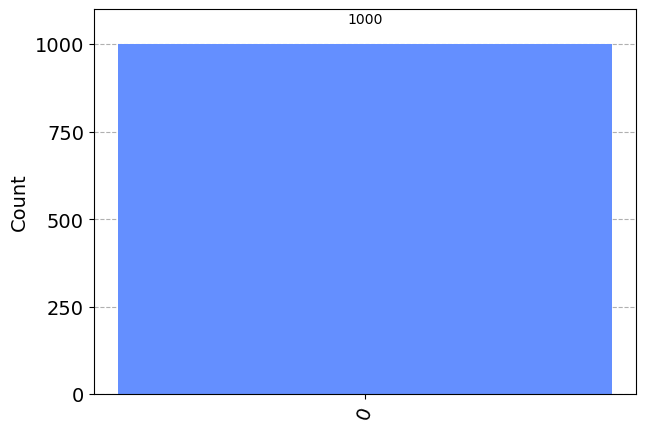

In [11]:
Fig = plot_histogram(counts)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_1_hist')
Fig

<a id='sec_Notebooks_Circ_1_qubit_1.2'></a>
### Puerta $X$

Veamos ahora un ejemplo de un circuito con la puerta $X$ para ver su acción

      ┌───┐┌─┐
  q0: ┤ X ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0 


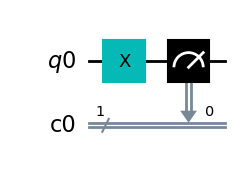

In [12]:
# Creamos el circuito pasandole los registros. 
circuit_X = QuantumCircuit(quantum_reg, classic_reg)

# Añadimos la puerta X al primer (y único) qúbit
circuit_X.x(0)

# Añadimos el medidor
circuit_X.measure(quantum_reg, classic_reg)

# Podemos dibujarlo en modo texto
print(circuit_X.draw(output='text'))

# Podemos dibujarlo como figura de matplolib
Fig = circuit_X.draw(output='mpl') # mpl es de Matplolib
Fig.savefig("Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_X")
Fig

Como ya hemos definido el simulador `simulador = AerSimulator(method = "statevector")` no hace falta que lo volvamos a hacer

Resultado:  {'1': 1000}


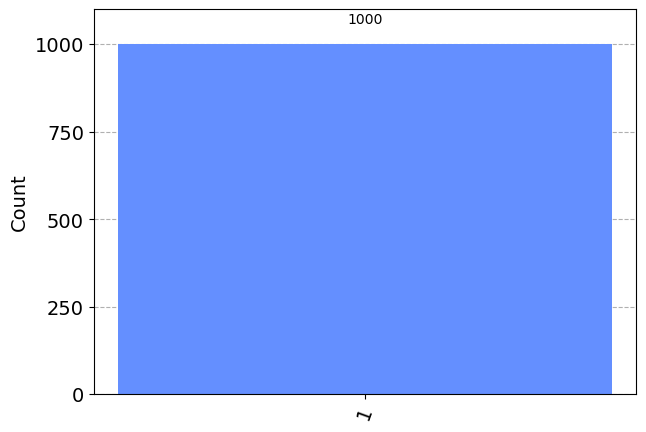

In [13]:
# simulador = AerSimulator(method = 'statevector')
# transpilamos
t_circuit_X = transpile(circuit_X, backend = simulador)

# Ejecutamos
result_X = simulador.run(t_circuit_X, shots = 1000).result()
counts_X = result_X.get_counts()
print("Resultado: ", counts_X)

Fig = plot_histogram(counts_X)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_X_hist')
Fig

<a id='sec_Notebooks_Circ_1_qubit_1.3'></a>
### Puerta H

Veamos ahora un ejemplo de un circuito con la puerta $H$ para ver su acción

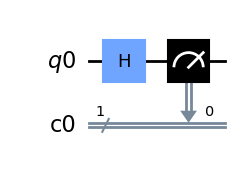

In [14]:
# Creamos el circuito pasandole los registros. 
circuit_H = QuantumCircuit(quantum_reg, classic_reg)

# Añadimos la puerta X al primer (y único) qúbit
circuit_H.h(0)

# Añadimos el medidor
circuit_H.measure(quantum_reg, classic_reg)

# Podemos dibujarlo en modo texto
#print(circuit_H.draw(output='text'))

# Podemos dibujarlo como figura de matplolib
Fig = circuit_H.draw(output='mpl') # mpl es de Matplolib
Fig.savefig("Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_H")
Fig

Como ya hemos definido el simulador `simulador = AerSimulator(method = "statevector")` no hace falta que lo volvamos a hacer

Resultado:  {'1': 502, '0': 498}


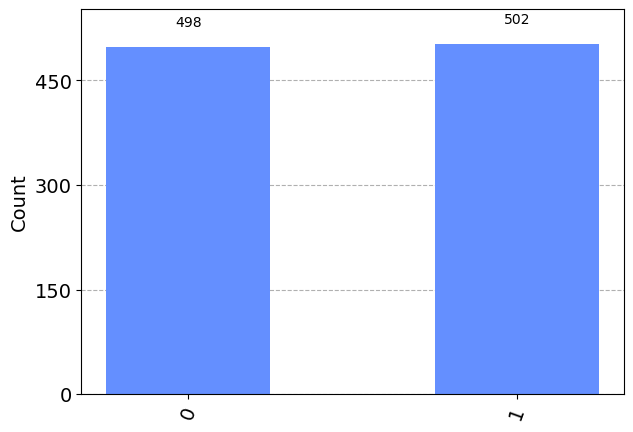

In [15]:
# simulador = AerSimulator(method = 'statevector')
# transpilamos
t_circuit_H = transpile(circuit_H, backend = simulador)

# Ejecutamos
result_H = simulador.run(t_circuit_H, shots = 1000).result()
counts_H = result_H.get_counts()
print("Resultado: ", counts_H)

Fig = plot_histogram(counts_H)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_H_hist')
Fig

Como podemos ver, ahora aproximadamente la mitad de las veces obtenemos $| 0 \rangle$ y la otra mitad obtenemos $| 1 \rangle$. Esto es debido a que 
$$
H |0  \rangle = \frac{1}{\sqrt{2}} \left(| 0 \rangle + | 1 \rangle \right)
$$
Recordemos que la probabilidad de medir cada estado es igual al módulo cuadrado de su amplitud (del coeficiente que acompaña al estado)

<a id='sec_Notebooks_Circ_1_qubit_1.4'></a>
### Inicializar el circuito a partir de un vector de estado 

In [16]:
circuit_state = QuantumCircuit(quantum_reg, classic_reg)

# inicializamos un estado arbitrario en la esfera de Bloch
theta = 0.5  #rad
phi   = 0.3  #rad
psi_state = [np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]

# Veamos el vector de estado
statevector_plus = Statevector(psi_state)
statevector_plus.draw('latex')

<IPython.core.display.Latex object>

Veamos las probabilidades teóricas

In [17]:
print('p_0=', np.round(np.abs(psi_state[0])**2,3),', p_1=', np.round(np.abs(psi_state[1])**2,3))

p_0= 0.939 , p_1= 0.061


Inicializamos el circuito y medimos

In [18]:
# inicializamos el estado de entrada  
circuit_state.initialize(psi_state,0)
circuit_state.measure(quantum_reg, classic_reg)

Resultado:  {'1': 6184, '0': 93816}


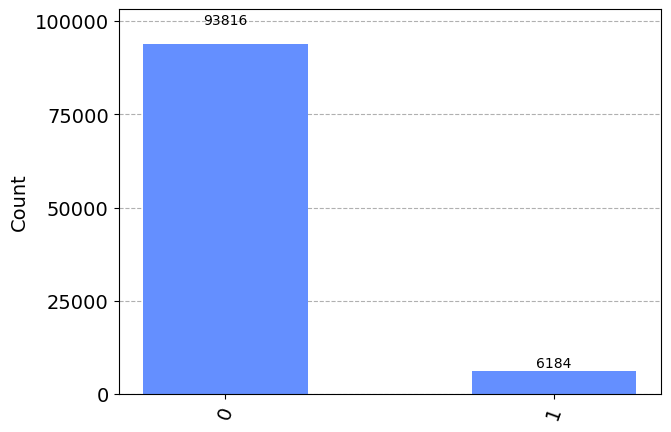

In [19]:
# simulador = AerSimulator(method = 'statevector')
# transpilamos
t_circuit_state = transpile(circuit_state, backend = simulador)

# Ejecutamos
result_state = simulador.run(t_circuit_state, shots = 100000).result()
counts_state = result_state.get_counts()
print("Resultado: ", counts_state)

Fig = plot_histogram(counts_state)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_state_hist')
Fig

vamos a recuperar las probabilidades haciendo estadística

In [20]:
def get_prob_dist(counts): # counts es un diccionario 
    N=sum([n for n in counts.values()]) # numero de shots
    prob_dist = {bit:np.round(v/N,4) for bit,v in counts.items()} # this is a modified dictionary
    if len(prob_dist) == 1:  # we are two amplitudes (one qubit), so in this case, pad with a 0
        prob_dist.append(0)
    return prob_dist

prob_distr_state = get_prob_dist(counts_state)
print("probability distribution =", prob_distr_state)

probability distribution = {'1': 0.0618, '0': 0.9382}


<a id='sec_Notebooks_Circ_1_qubit_2'></a>
## Mandar trabajos a un ordenador real de IBM   

Para mandar trabajos usaremos la librería `qiskit_ibm_provider`. Hasta hace no mucho se usaba la librería `qiskit_ibmq_provider`, pero esta se ha marcado como deprecated. 

Para mas información sobre `qiskit_ibm_provider` y las diferencias con la anterior librería, puede consultarse la [documentación de Qiskit](https://qiskit.org/ecosystem/ibm-provider/tutorials/Migration_Guide_from_qiskit-ibmq-provider.html)

Para mandar trabajos a los ordenadores cuánticos de IBM, lo primero que necesitamos es una cuenta en [IBMid](https://quantum-computing.ibm.com/). 
Una vez creada la cuenta, hay que copiar el token que aparece en la página principal. Este lo pegamos en la línea comentada en el siguiente cuadro de código (descomentando la linea)

In [21]:
from qiskit_ibm_provider import IBMProvider
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor


# Save account credentials.
#IBMProvider.save_account(token=MY_API_TOKEN)

# Load a previously saved account.
provider = IBMProvider()

# Select a different hub/group/project.
provider = IBMProvider(instance="ibm-q/open/main")

Vamos a mandar a ejecutar en hardware real el circuito de la puerta H

In [22]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_circuit_H = transpile(circuit_H, backend, optimization_level=3)
job = backend.run(t_circuit_H, shots = 1000)
job_id = job.job_id()
print(job_id)


cmqvpc9rcp70008sfegg


Podemos monitorizar desde el notebook en que estado está nuestro trabajo. Otra obción es hacerlo desde la [web](https://quantum-computing.ibm.com/jobs). La celda siguiente podemos correrla tantas veces como queramos para ver como está nuestro trabajo.

In [23]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

También podemos usar el job_monitor, que se actualiza solo sin tener que ejecutar varias veces la celda.

In [24]:
#job_monitor(job, interval = 1, line_discipline = '\n') 

Veamos en que ordenador se ha ejecutado

In [25]:
backend

<IBMBackend('ibm_nairobi')>

In [26]:
result_IBM = job.result()
counts_IBM = result_IBM.get_counts()
counts_IBM

{'0': 506, '1': 494}

<a id='sec_Notebooks_Circ_1_qubit_2.1'></a>
### Recuperar resultados de trabajos anteriores con el job id

Es importante guardar el Job Id, pues con el podemos recuperar los resultados de un trabajo anterior. Por ejemplo, lo que podemos hacer es ejecutar un circuito y si vemos usando `job.status()` que tarda mucho en entrar en ejecución, podemos anotarnos el id y otro ver los resultado, sin tener que dejar el Notebook abierto.

In [27]:
job_id="cjrjkq4ieg62g9od3jk0"
retrieve_job = provider.retrieve_job(job_id)
retrieve_job.status()

<JobStatus.DONE: 'job has successfully run'>

In [28]:
result_ret = retrieve_job.result()
counts_ret = result_ret.get_counts()
counts_ret

{'0': 508, '1': 492}

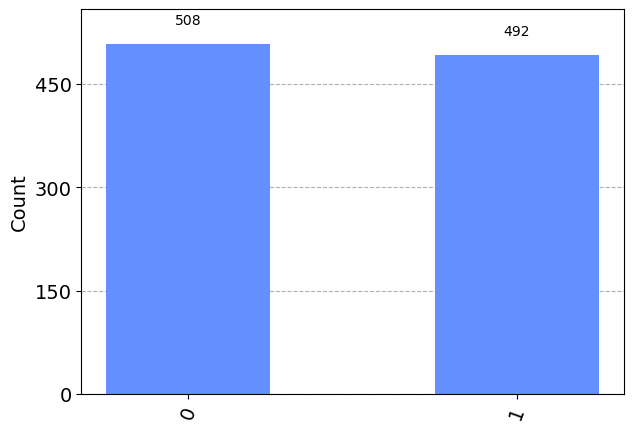

In [29]:
Fig = plot_histogram(counts_ret)
Fig

<a id='sec_Notebooks_Circ_1_qubit_3'></a>
## La moneda cuántica   

Vamos a ver aquí a modo de ejemplo un experimento simple: \textbf{la moneda cuántica.}

El resultado de tirar una moneda al aire es una variable aleatoria con dos resultados equiprobables:  cara y cruz.  Es irrelevante si analizamos el resultado cada tirada o cada dos, o tres tiradas. Las frecuencias relativas de caras y cruces, siempre serán próximas a $1/2$. Es decir, podemos tirar la moneda, recogerla sin mirarla, volver a tirar, y las probabilidades no cambian.

Podemos imaginar un experimento similar con un qúbit, donde cara $\to 0$ y cruz $\to 1$ son los resultados posibles de la medida en la base $Z$. Como al tirar la moneda, mientras esta está en el aire podemos pensar que está en ``una superposición equiprobable del cara y cruz'', el hecho de \textbf{tirar la moneda} en computación cuántica será aplicar el operador $H$. 

Haciendo esta consideración, podemos ver que no es lo mismo tirar la moneda 1 vez y mirar 
$$
\ket{0}~ \stackrel{\rm tirar}{\longrightarrow} ~ H \ket{0}= \ket{+} ~ \stackrel{\rm medir}{\longrightarrow} ~p(0) = p(1) = 0.5
$$
que tirarla dos veces y mirar
$$
\ket{0}~ \stackrel{\rm tirar}{\longrightarrow} ~ H \ket{0}~ \stackrel{\rm tirar}{\longrightarrow} H^2\ket{0} = \ket{0} ~ \stackrel{\rm medir}{\longrightarrow} ~p(0) = 1 ~,~p(1) = 0
$$
El objetivo de este experimento es simplemente ver que ciertas puertas son sus propias inversas y que cuando aplicamos las aplicamos un número par de veces seguidas, es como si no aplicáramos nada. 

Hagamos dos circuitos para hacer dos pruebas. Veamos que pasa si medimos después de la primero $H$ y si no:

In [30]:
classic_reg_2_bits = ClassicalRegister(2)

circuit_coin_1 = QuantumCircuit(quantum_reg, classic_reg_2_bits)
circuit_coin_1.h(0)
circuit_coin_1.measure(quantum_reg, classic_reg_2_bits[0]) # Añadimos una medida intermedia.
circuit_coin_1.h(0)
circuit_coin_1.measure(quantum_reg, classic_reg_2_bits[1])

circuit_coin_2 = QuantumCircuit(quantum_reg, classic_reg)
circuit_coin_2.h(0)
circuit_coin_2.h(0)
circuit_coin_2.measure(quantum_reg, classic_reg)



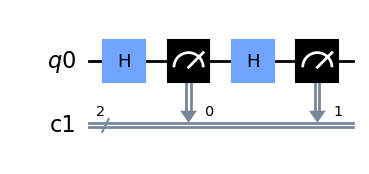

In [31]:
Fig_coin_1 = circuit_coin_1.draw(output='mpl') # mpl es de Matplolib
Fig_coin_1.savefig("Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_coin_1")
Fig_coin_1

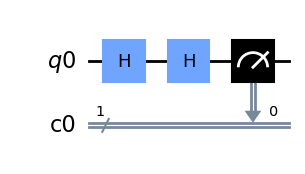

In [32]:
Fig_coin_2 = circuit_coin_2.draw(output='mpl') # mpl es de Matplolib
Fig_coin_2.savefig("Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_coin_1")
Fig_coin_2

In [33]:
# transpilamos
t_circuit_coin_1 = transpile(circuit_coin_1, backend = simulador)
t_circuit_coin_2 = transpile(circuit_coin_2, backend = simulador)

# Ejecutamos
result_coin_1 = simulador.run(t_circuit_coin_1, shots = 1000).result()
counts_coin_1 = result_coin_1.get_counts()
print("Resultado: ", counts_coin_1)

result_coin_2 = simulador.run(t_circuit_coin_2, shots = 1000).result()
counts_coin_2 = result_coin_2.get_counts()
print("Resultado: ", counts_coin_2)

Resultado:  {'11': 240, '01': 241, '10': 243, '00': 276}
Resultado:  {'0': 1000}


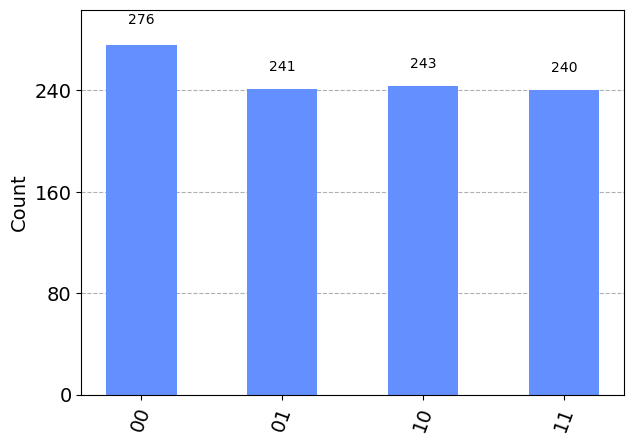

In [34]:
Fig = plot_histogram(counts_coin_1)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_coin_1_hist')
Fig

Lo resultados $00$ y$11$ son aquellos en los que hemos medido los mismo en los dos medidores, es decir, en los dos tiradas ha salido cara o cruz. 
En los otros casos, no hemos medido lo mismo, es decir, en una tirada ha salido cara y en la otra cruz.

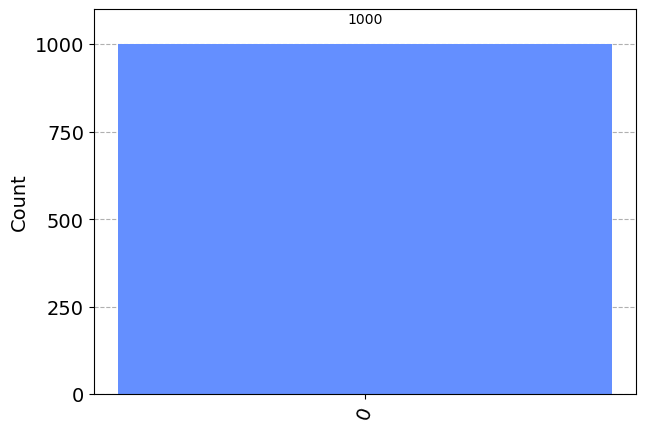

In [35]:
Fig = plot_histogram(counts_coin_2)
Fig.savefig('Figuras_Chapter_02-Circuitos_1_qubit_medidas_y_RealHardware/Fig_circuit_coin_2_hist')
Fig

Vemos que **medir altera nuestro resultado**

<a id='sec_Notebooks_Circ_1_qubit_4'></a>
## Valores esperados  

<a id='sec_Notebooks_Circ_1_qubit_4.1'></a>
### Valor esperado de un observable arbitrario (operador hermítico).

Vamos a ver como se mide el valor esperado de un observable arbitrario $A$ en un estado arbitrario $\ket{\Psi}$. Estos valores esperados se denotan de la siguiente forma: $\langle Z \rangle_\Psi$. 

Cualquier observable sobre un cúbit cumple $A = A^\dagger$ (es hermítico) con lo que puede expresarse en la base
	\begin{equation} \label{ec_medidas1_expansion_A_en_Paulis}
	A = a I + n_x X + n_y Y  + n_z Z \, .
	\end{equation}
Los coeficientes se obtienen haciendo uso de las relaciones $\frac{1}{2}$ tr$ (\sigma_i \sigma_j) = \delta_{ij}$ y de tr$(\sigma_i)=0$, de las cuales se obtiene
	\begin{align}
	&\boxed{a  = \frac{1}{2} \text{ tr}(A)},        &         &\boxed{n_i = \frac{1}{2} \text{ tr}  (A \sigma_i)},
	\end{align} 
Entonces, podremos obtener el valor esperado de $A$  si somos capaces de medir los valores esperados de $X,$ $Y$ y $Z$.
	\begin{equation}
	\boxed{\langle A\rangle_\Psi = a + n_x \langle X\rangle_\Psi + n_y \langle Y\rangle_\Psi + n_z \langle Z\rangle_\Psi}
	\end{equation}

<a id='sec_Notebooks_Circ_1_qubit_4.1.1'></a>
#### Inicializando estado $| \Psi \rangle $

Vamos a usar el resultado del circuito de la [sección 1.1.4](#sec_1.1.4)

In [36]:
statevector_plus.draw('latex')

<IPython.core.display.Latex object>

In [37]:
print('p_0=', np.round(np.abs(psi_state[0])**2,3),', p_1=', np.round(np.abs(psi_state[1])**2,3))
print("probability distribution =", prob_distr_state)

p_0= 0.939 , p_1= 0.061
probability distribution = {'1': 0.0618, '0': 0.9382}


<a id='sec_Notebooks_Circ_1_qubit_4.1.2'></a>
#### Midiendo $\langle Z \rangle$

In [38]:
# Circuito
circuit_Z_mean = QuantumCircuit(quantum_reg, classic_reg)
circuit_Z_mean.initialize(psi_state,0)
circuit_Z_mean.measure(quantum_reg, classic_reg)

# Transpilamos
t_circuit_Z_mean = transpile(circuit_Z_mean, backend = simulador)

# Ejecutamos
result_Z_mean = simulador.run(t_circuit_Z_mean, shots = 100000).result()
counts_Z_mean = result_Z_mean.get_counts()
print("Resultado: ", counts_Z_mean)

# Distribución de probabilidad
prob_distr_Z_mean = get_prob_dist(counts_Z_mean)
print("probability distribution =", prob_distr_Z_mean)

# Calculamos <Z>
mean_Z = 0

for bits, probs  in prob_distr_Z_mean.items():
    mean_Z += (-1)**(int(bits)) * probs  

print('<Z> =',np.round(mean_Z,5))

Resultado:  {'1': 5981, '0': 94019}
probability distribution = {'1': 0.0598, '0': 0.9402}
<Z> = 0.8804


<a id='sec_Notebooks_Circ_1_qubit_4.1.3'></a>
#### Midiendo $\langle X \rangle$

In [39]:
# Circuito
circuit_X_mean = QuantumCircuit(quantum_reg, classic_reg)
circuit_X_mean.initialize(psi_state,0)
circuit_X_mean.h(quantum_reg)
circuit_X_mean.measure(quantum_reg, classic_reg)

# Transpilamos
t_circuit_X_mean = transpile(circuit_X_mean, backend = simulador)

# Ejecutamos
result_X_mean = simulador.run(t_circuit_X_mean, shots = 100000).result()
counts_X_mean = result_X_mean.get_counts()
print("Resultado: ", counts_X_mean)

# Distribución de probabilidad
prob_distr_X_mean = get_prob_dist(counts_X_mean)
print("probability distribution =", prob_distr_X_mean)

# Calculamos <X>
mean_X = 0

for bits, probs  in prob_distr_X_mean.items():
    mean_X += (-1)**(int(bits)) * probs  

print('<X> =',np.round(mean_X,5))

Resultado:  {'1': 26911, '0': 73089}
probability distribution = {'1': 0.2691, '0': 0.7309}
<X> = 0.4618


<a id='sec_Notebooks_Circ_1_qubit_4.1.4'></a>
#### Midiendo $\langle Y \rangle$

In [40]:
# Circuito
circuit_Y_mean = QuantumCircuit(quantum_reg, classic_reg)
circuit_Y_mean.initialize(psi_state,0)
circuit_Y_mean.sdg(quantum_reg)
circuit_Y_mean.h(quantum_reg)
circuit_Y_mean.measure(quantum_reg, classic_reg)

# Transpilamos
t_circuit_Y_mean = transpile(circuit_Y_mean, backend = simulador)

# Ejecutamos
result_Y_mean = simulador.run(t_circuit_Y_mean, shots = 100000).result()
counts_Y_mean = result_Y_mean.get_counts()
print("Resultado: ", counts_Y_mean)

# Distribución de probabilidad
prob_distr_Y_mean = get_prob_dist(counts_Y_mean)
print("probability distribution =", prob_distr_Y_mean)

# Calculamos <Y>
mean_Y = 0

for bits, probs  in prob_distr_Y_mean.items():
    mean_Y += (-1)**(int(bits)) * probs  

print('<Y> =',np.round(mean_Y,5))

Resultado:  {'1': 43003, '0': 56997}
probability distribution = {'1': 0.43, '0': 0.57}
<Y> = 0.14


<a id='sec_Notebooks_Circ_1_qubit_4.2'></a>
### Valor esperado de un operador unitario (no necesariamente hermítico)

Vamos a construir dos operadores U y V y calcular 
$$
\langle V \rangle_\Psi = \langle \Psi | V| \Psi \rangle = \langle 0 | U^\dagger V U |0\rangle = \langle 0 | {\tilde \Psi} \rangle
$$

In [41]:
from qiskit.circuit.library import U3Gate

circuit_V_mean = QuantumCircuit(quantum_reg, classic_reg)

theta_U  = np.pi/6
phi_U    = np.pi/2
varphi_U = np.pi

theta_V  = np.pi/2
phi_V    = np.pi/3
varphi_V = 2*np.pi/7

U        = U3Gate(theta_U, phi_U, varphi_U)
U_dagger = U3Gate(theta_U, phi_U, varphi_U).inverse()
V        = U3Gate(theta_V, phi_V, varphi_V)

circuit_V_mean.append(U, quantum_reg)
circuit_V_mean.append(V, quantum_reg)
circuit_V_mean.append(U_dagger, quantum_reg)
circuit_V_mean.measure(quantum_reg, classic_reg)

# Transpilamos
t_circuit_V_mean = transpile(circuit_V_mean, backend = simulador)

# Ejecutamos
shots = 50000
result_V_mean = simulador.run(t_circuit_V_mean, shots = shots).result()
counts_V_mean = result_V_mean.get_counts()
print("Resultado: ", counts_V_mean)

# Media
print(" <V> = ", counts_V_mean['0']/shots)

Resultado:  {'1': 5321, '0': 44679}
 <V> =  0.89358
